# EDA

In [32]:
%matplotlib inline

!pip install wquantiles

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import seaborn as sns
import matplotlib.pylab as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
cp = pd.read_csv("data.csv")
cp

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [34]:
jumlah_fitur = cp.shape[1]

print("Jumlah fitur: ", jumlah_fitur)

Jumlah fitur:  10


In [35]:
jumlah_data = cp.shape[0]

print("Jumlah data: ", jumlah_data)

Jumlah data:  100


In [36]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [37]:
# Missing Value Check
cp.isna().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

<ipython-input-38-c2d91b25d018>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cp.corr(),annot=True,vmin=0, vmax=1, center=True)


<Axes: >

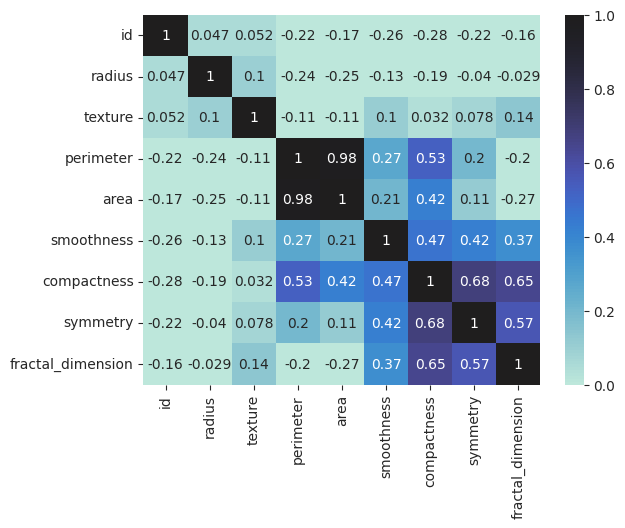

In [38]:
# Coleration Matrix Check
sns.heatmap(cp.corr(),annot=True,vmin=0, vmax=1, center=True)

In [39]:
cp.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [40]:
cp.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [41]:
cp.groupby('diagnosis_result').mean()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
diagnosis_result,,,,,,,,,
B,62.184211,17.947368,17.763158,78.500000,474.342105,0.099053,0.086895,0.184053,0.064605
M,43.338710,16.177419,18.516129,107.983871,842.951613,0.104984,0.151097,0.198758,0.064742


In [42]:
cp.diagnosis_result = [1 if each == 'M' else 0 for each in cp.diagnosis_result]

In [43]:
cp.diagnosis_result.value_counts()

1    62
0    38
Name: diagnosis_result, dtype: int64

In [44]:
cp2 = pd.get_dummies(cp,columns=['diagnosis_result'],drop_first=True)

In [45]:
cp2.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,diagnosis_result_1
0,1,23,12,151,954,0.143,0.278,0.242,0.079,1
1,2,9,13,133,1326,0.143,0.079,0.181,0.057,0
2,3,21,27,130,1203,0.125,0.160,0.207,0.060,1
3,4,14,16,78,386,0.070,0.284,0.260,0.097,1
4,5,9,19,135,1297,0.141,0.133,0.181,0.059,1


# Data Standardization

In [46]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()
scaler.fit(cp2.drop('diagnosis_result_1',axis=1))
#removing the last column of the dataframe as this table will be used for the feature matrix
scaled_features=scaler.transform(cp2.drop('diagnosis_result_1',axis=1))
new_data=pd.DataFrame(scaled_features,columns=cp2.columns[:-1])

In [48]:
new_data.head()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,-1.714816,1.266830,-1.205746,2.301611,0.789417,2.764210,2.486970,1.594151,1.764464
1,-1.680173,-1.617011,-1.012208,1.537520,1.958830,2.764210,-0.784061,-0.397314,-0.948199
2,-1.645531,0.854853,1.697335,1.410172,1.572169,1.528655,0.547364,0.451507,-0.578290
3,-1.610888,-0.587068,-0.431591,-0.797201,-0.996139,-2.246650,2.585594,2.181796,3.983916
4,-1.576245,-1.617011,0.149025,1.622419,1.867666,2.626926,0.103555,-0.397314,-0.701593


In [49]:
x = new_data
y = cp2['diagnosis_result_1']

# Data Splitting

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)
method_names=[]
method_scores=[]

# Data Visualization

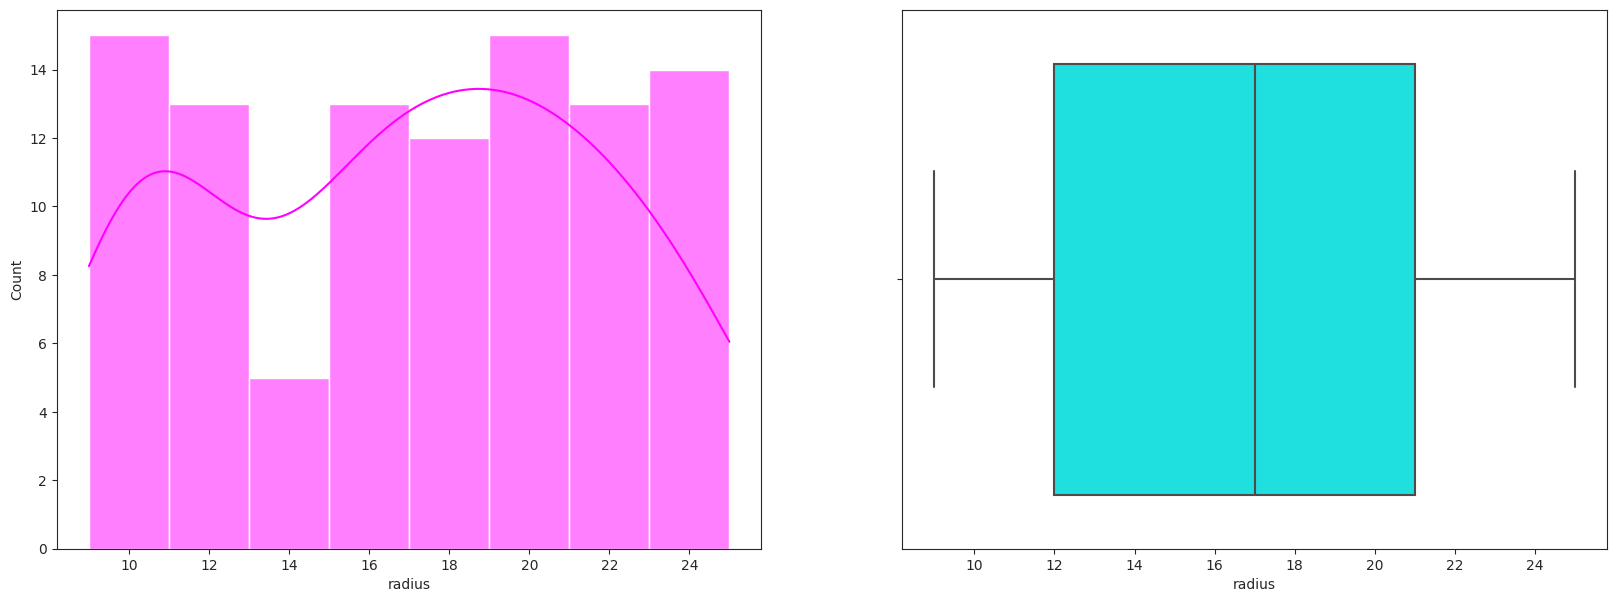

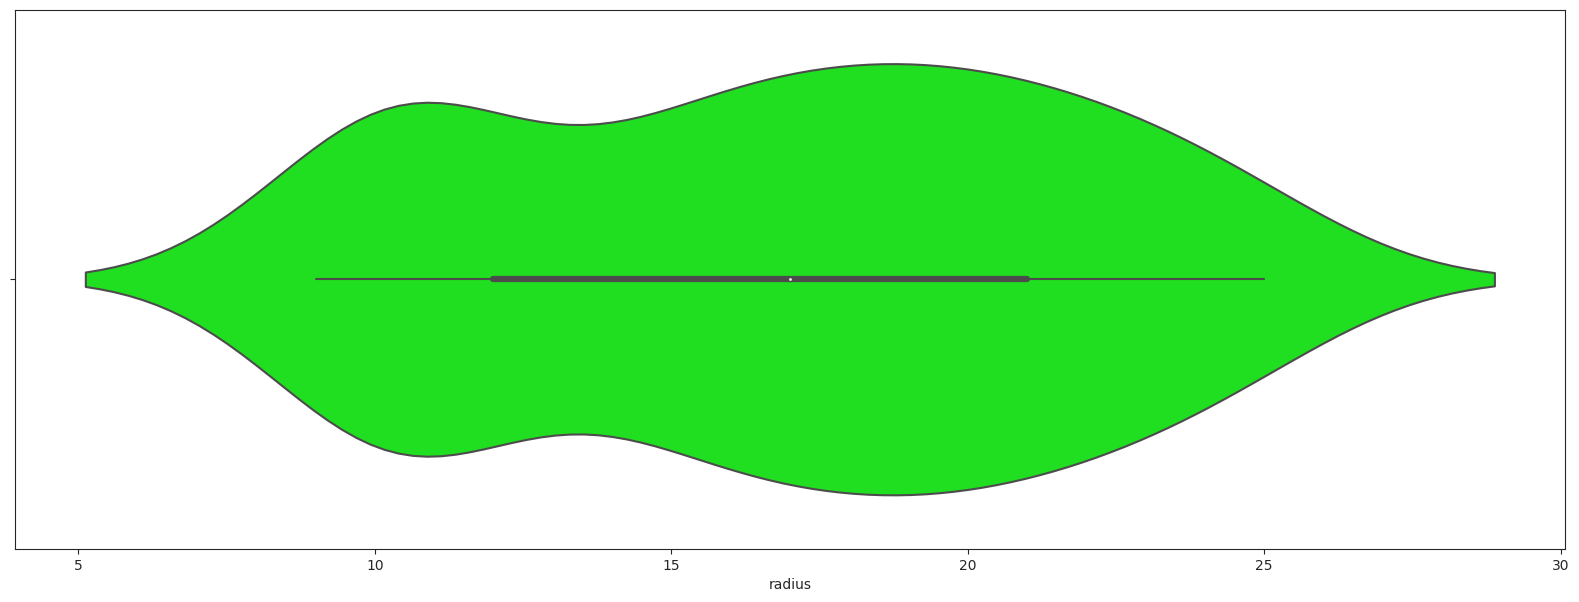

In [52]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 7))
fig2, ax2 = plt.subplots(figsize=(20, 7))

sns.histplot(data=cp, x="radius", kde=True, ax=ax1[0],color = 'magenta')
sns.boxplot(data=cp, x="radius", ax=ax1[1],color = 'aqua')

sns.violinplot(data=cp, x="radius", ax=ax2,color = 'lime')

plt.show()


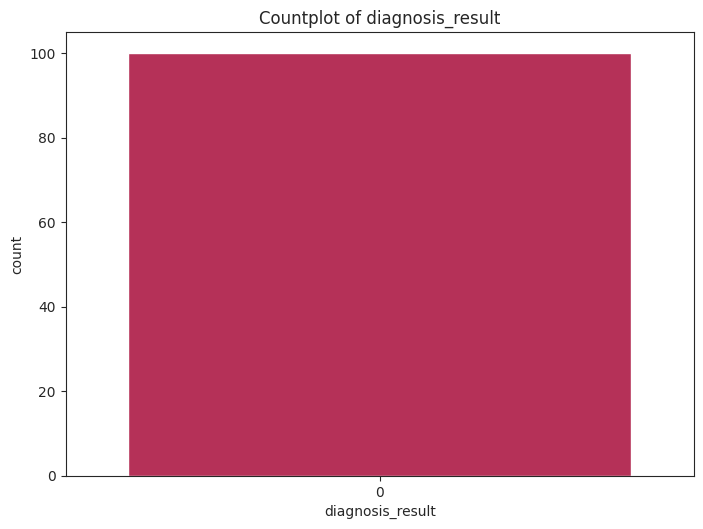

In [53]:
cols = ['diagnosis_result']

# Subplot setiap kategori
plt.figure(figsize=(20, 15))
plotnumber = 1
for column in cols:
    if plotnumber <= len(cols):
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(cp[column], palette='rocket', color='black')
        plt.xlabel(column)
        plt.title("Countplot of {}".format(column))

    plotnumber += 1

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


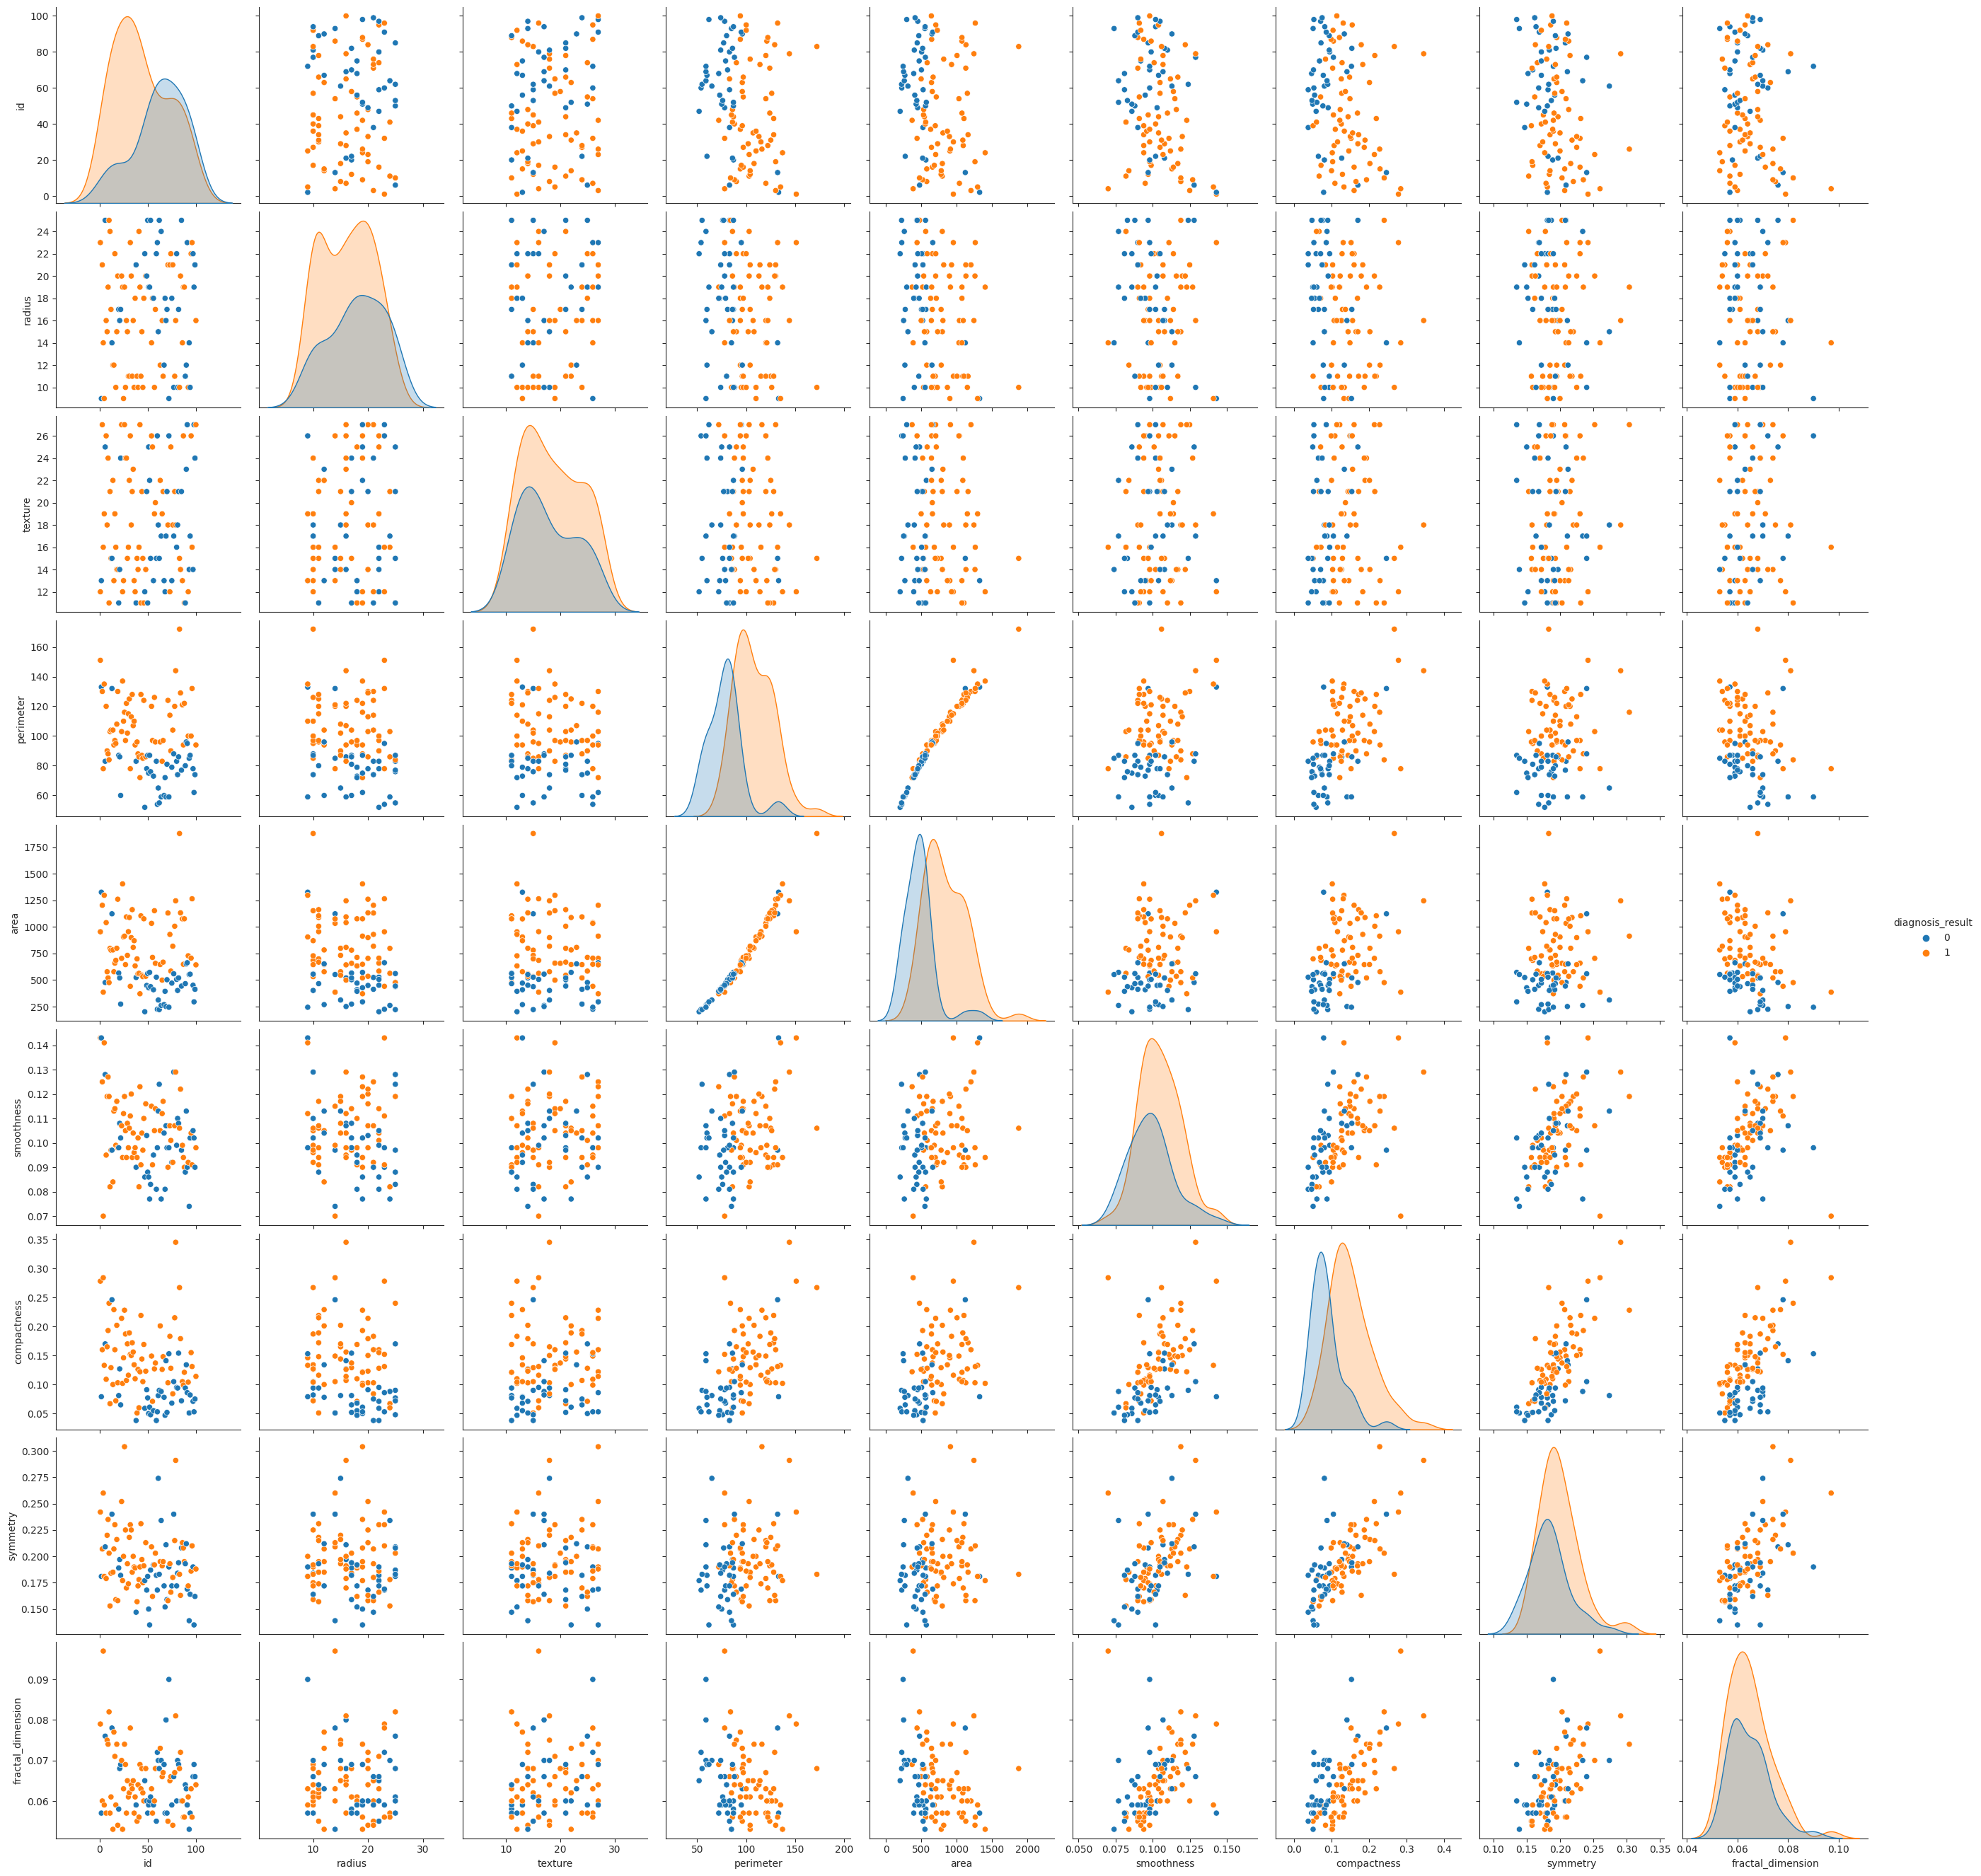

In [54]:
sns.set_style("ticks")
sns.pairplot(cp,hue="diagnosis_result",size=3);
plt.show()

# Add extraction feature (PCA)

In [55]:
pca = PCA(n_components=2)  # Ubah jumlah komponen sesuai kebutuhan
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Classification (KNN)

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

Distance Function

In [57]:
def euclidean(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist

In [58]:
def predict(x_train, y, x_input, k, pca=None):
    if pca is not None:
        x_train = pca.transform(x_train)
        x_input = pca.transform(x_input)

    op_labels = []

    for item in x_input:
        point_dist = []

        for j in range(len(x_train)):
            distances = euclidean(np.array(x_train[j, :]), item)
            point_dist.append(distances)
        point_dist = np.array(point_dist)

        dist = np.argsort(point_dist)[:k]

        labels = y[dist]

        lab = mode(labels)
        lab = lab.mode[0]
        op_labels.append(lab)

    return op_labels

In [59]:
def euclidean(p1,p2):
  dist = np.sqrt(np.sum((p1-p2)**2))
  return dist

Calculate KNN

Masukkan nilai K: 4
K = 4: 0.8181818181818182


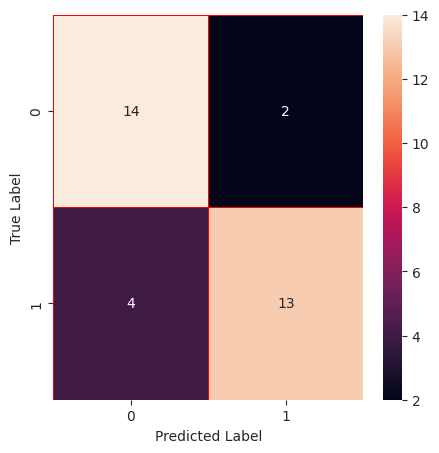

In [61]:
y

In [62]:
knn.fit(x_train_pca,y_train)
pred=knn.predict(x_test_pca)

In [63]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.87      0.76      0.81        17

    accuracy                           0.82        33
   macro avg       0.82      0.82      0.82        33
weighted avg       0.82      0.82      0.82        33



In [64]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_pca, y_train)
    pred_i = knn.predict(x_test_pca)
    error_rate.append(np.mean(pred_i != y_test))

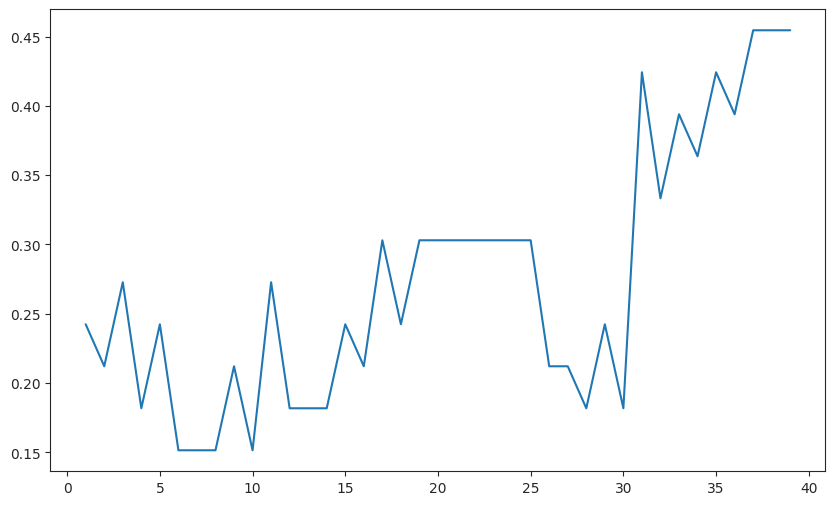

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Masukkan jumlah Pohon: 14
Random Forest Algorithm Accuracy Score: 75.76%
Accuracy Score is 75.76%


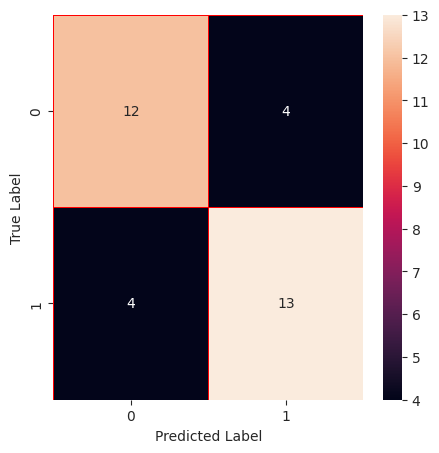

In [72]:
n_estimators = int(input("Masukkan jumlah Pohon: "))
rf = RandomForestClassifier(class_weight="balanced", n_estimators=n_estimators, random_state=1)
rf.fit(x_train_pca, y_train)

y_pred_rf = rf.predict(x_test_pca)
acc = metrics.accuracy_score(y_pred_rf, y_test.values.ravel()) * 100
print("Random Forest Algorithm Accuracy Score: {:.2f}%".format(acc))
print("Accuracy Score is {:.2f}%".format(acc))

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(conf_mat_rf, annot=True, linewidths=0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
rf.fit(x_train_pca, y_train.values.ravel())
y_pred = rf.predict(x_test_pca)

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        16
           1       0.76      0.76      0.76        17

    accuracy                           0.76        33
   macro avg       0.76      0.76      0.76        33
weighted avg       0.76      0.76      0.76        33



# Save the Training Model

In [78]:
import pickle

In [79]:
models = {
    'Random Forest': rf,
    'KNN': knn
}

In [80]:
with open('models.sav', 'wb') as f:
    pickle.dump(models, f)